# Exploratory Data Analysis

### Import Libraries

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
## Import dataset
dataset = pd.read_csv('Dataset.csv')

### Check values in each categorical variable

In [161]:
# 1. True categorical columns
categorical_cols = dataset.select_dtypes(include=['object', 'category']).columns.tolist()

# 2. Numeric-coded categorical / binary columns
numeric_categorical_cols = ['Had_alcohol_in_the_past', 'Has_Disability', 
                            'Had_Arthritis', 'Had_heart_attack', 'Had_Thyroid', 
                            'Had_Liver_COndition', 'Had_Cancer', 'functional_difficulty_composite',
                            'Takes_vitamin_supplements', 'Covered_by_health_insurance', 
                            'Tested_for_HIV_Virus', 'Had_high_blood_pressure']

# Combine them
all_categorical_cols = categorical_cols + numeric_categorical_cols

# 3. Loop through all categorical-like columns
for col in all_categorical_cols:
    print(f"Column: {col}")
    counts = dataset[col].value_counts(dropna=False)
    print(counts)
    print("-"*50)


Column: Had_alcohol_in_the_past
Had_alcohol_in_the_past
NaN    6452
1.0    4918
2.0     558
9.0       5
Name: count, dtype: int64
--------------------------------------------------
Column: Has_Disability
Has_Disability
2.0    6599
NaN    3790
1.0    1544
Name: count, dtype: int64
--------------------------------------------------
Column: Had_Arthritis
Had_Arthritis
2.0    5258
NaN    4126
1.0    2532
9.0      17
Name: count, dtype: int64
--------------------------------------------------
Column: Had_heart_attack
Had_heart_attack
2.0    7462
NaN    4126
1.0     332
9.0      13
Name: count, dtype: int64
--------------------------------------------------
Column: Had_Thyroid
Had_Thyroid
2.0    6734
NaN    4127
1.0    1053
9.0      18
7.0       1
Name: count, dtype: int64
--------------------------------------------------
Column: Had_Liver_COndition
Had_Liver_COndition
2.0    7369
NaN    4126
1.0     425
9.0      11
7.0       2
Name: count, dtype: int64
-------------------------------------

### Check the columns in the dataset

In [162]:
dataset.columns

Index(['Had_alcohol_in_the_past', 'General_hearing_condition',
       'Had_high_blood_pressure', 'WBC', 'Haemoglobin', 'Platelete', 'Gender',
       'Age', 'Race_Ethnicity', 'Country_of_Birth', 'Education_Level',
       'Marital_Status', 'Household_Size', 'Income_to_Poverty_Ratio',
       'Stay_in_the_shade', 'Has_diabetes', 'Takes_vitamin_supplements',
       'Has_Disability', 'Fasting_Glucose', 'HDL_mg', 'Has_Hepatitis',
       'Covered_by_health_insurance', 'Tested_for_HIV_Virus',
       'General_health_condition', 'Received_Hepatitis_A_Vaccine',
       'Family_poverty_level_index', 'Has_Kidney_Failure', 'Had_Asthma',
       'Had_Arthritis', 'Had_heart_attack', 'Had_Thyroid',
       'Had_Liver_COndition', 'Had_Cancer', 'Teeth_and_gum_health',
       'Number_of_Moderate_Physical_activities_per_week',
       'Number_of_Vigorous_Physical_activities_per_week',
       'Advised_to_take_aspirin', 'Number_of_hours_of_sleep',
       'Cholestrol_level', 'SystolicBP', 'DiastolicBP', 'Pulse',
 

In [163]:
print("Shape of dataset:", dataset.shape)

Shape of dataset: (11933, 49)


### Remove duplicates

In [164]:
num_duplicates = dataset.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

dataset = dataset.drop_duplicates().reset_index(drop=True)
print("New dataset shape after removing duplicates:", dataset.shape)


Number of duplicate rows: 12
New dataset shape after removing duplicates: (11921, 49)


### Check Data Types

In [165]:
print("\nData types:")
print(dataset.dtypes)


Data types:
Had_alcohol_in_the_past                            float64
General_hearing_condition                          float64
Had_high_blood_pressure                            float64
WBC                                                float64
Haemoglobin                                        float64
Platelete                                          float64
Gender                                             float64
Age                                                float64
Race_Ethnicity                                     float64
Country_of_Birth                                   float64
Education_Level                                    float64
Marital_Status                                     float64
Household_Size                                     float64
Income_to_Poverty_Ratio                            float64
Stay_in_the_shade                                  float64
Has_diabetes                                       float64
Takes_vitamin_supplements                  

### Missing Values per column

In [166]:
print("\nMissing values per column:")
print(dataset.isnull().sum())


Missing values per column:
Had_alcohol_in_the_past                            6440
General_hearing_condition                           192
Had_high_blood_pressure                            3423
WBC                                                4328
Haemoglobin                                        4328
Platelete                                          4328
Gender                                                0
Age                                                   0
Race_Ethnicity                                        0
Country_of_Birth                                     19
Education_Level                                    4127
Marital_Status                                     4129
Household_Size                                        0
Income_to_Poverty_Ratio                            2035
Stay_in_the_shade                                  7619
Has_diabetes                                        192
Takes_vitamin_supplements                          3285
Has_Disability      

### % of missing values

Fasting_Glucose                                    69.197215
MRT_Avg_Time                                       66.856807
Stay_in_the_shade                                  63.912423
Had_alcohol_in_the_past                            54.022314
depression_rank                                    53.703548
Advised_to_take_aspirin                            52.084557
Tested_for_HIV_Virus                               51.757403
balance_combined                                   49.165338
HDL_mg                                             42.202835
Cholestrol_level                                   42.202835
mean_steroid_ng_dl                                 39.669491
SystolicBP                                         37.270363
DiastolicBP                                        37.270363
Pulse                                              37.270363
blood_macros                                       36.364399
Platelete                                          36.305679
Haemoglobin             

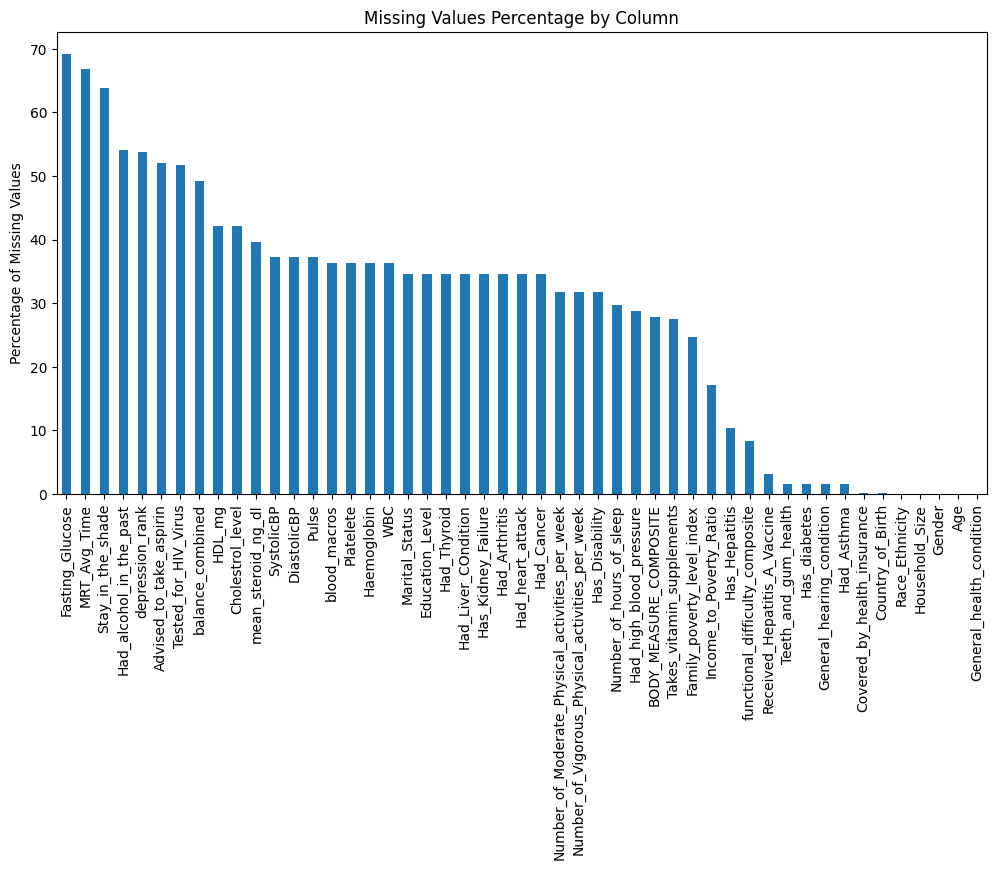

In [167]:
missing_percent = dataset.isnull().mean() * 100
print(missing_percent.sort_values(ascending=False))
missing_percent.sort_values(ascending=False).plot(kind='bar', figsize=(12,6))
plt.ylabel("Percentage of Missing Values")
plt.title("Missing Values Percentage by Column")
plt.show()

### Distribution 

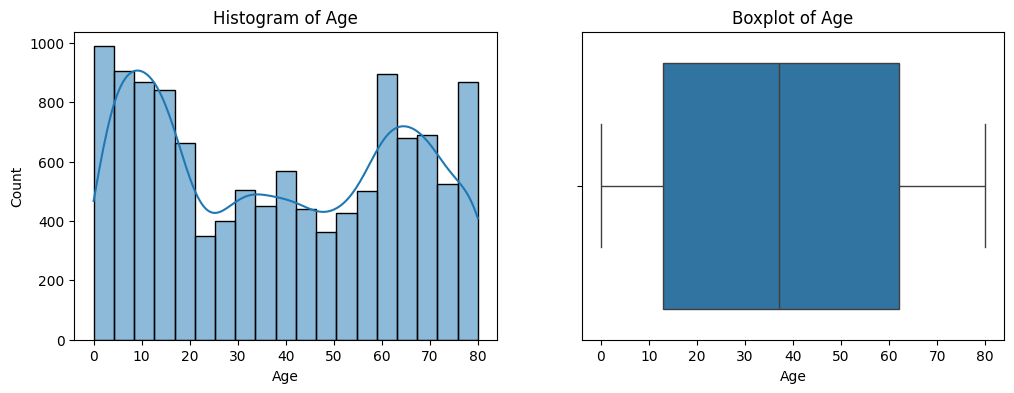

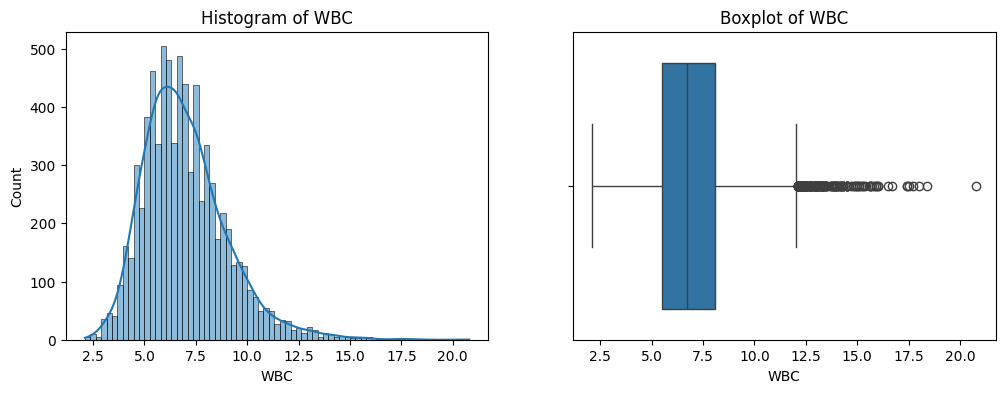

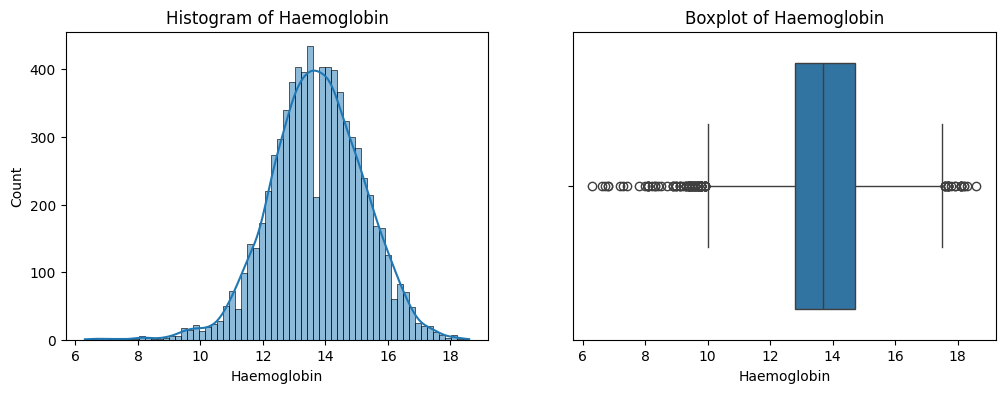

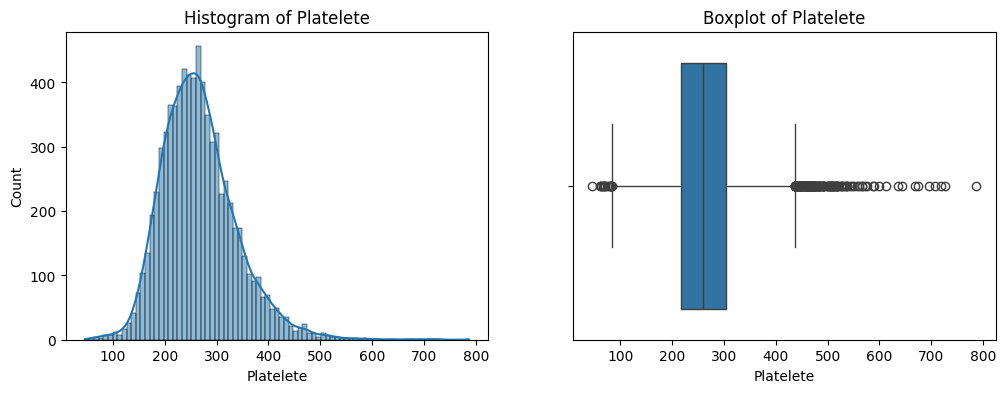

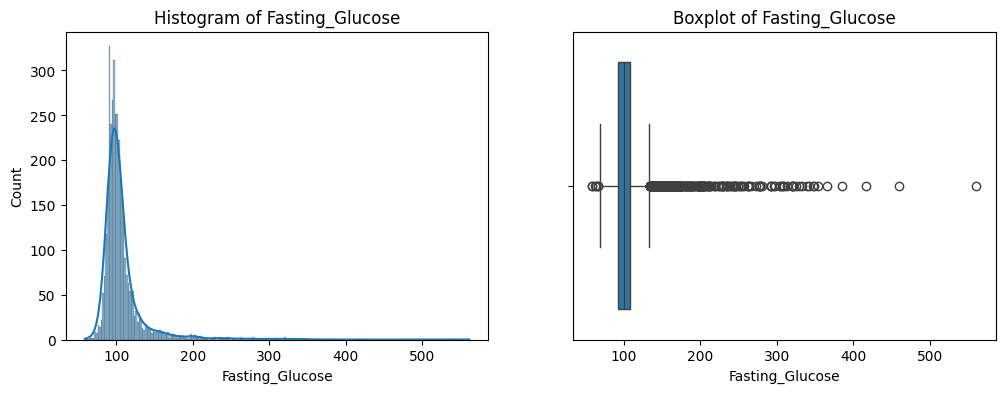

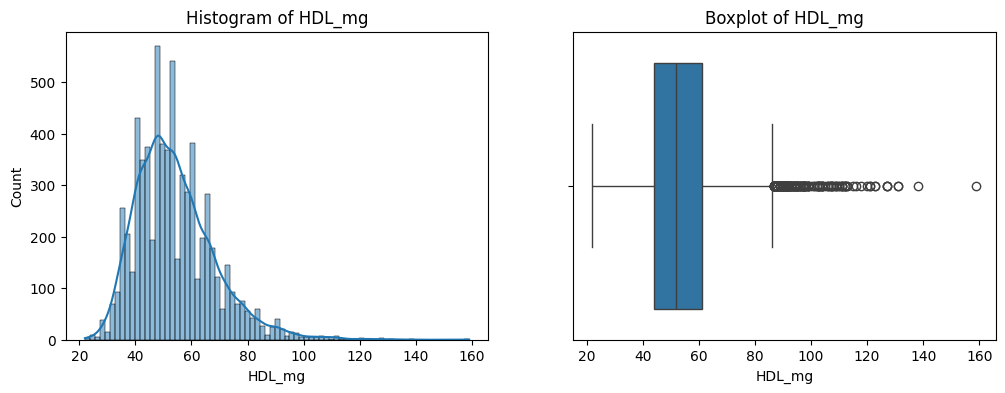

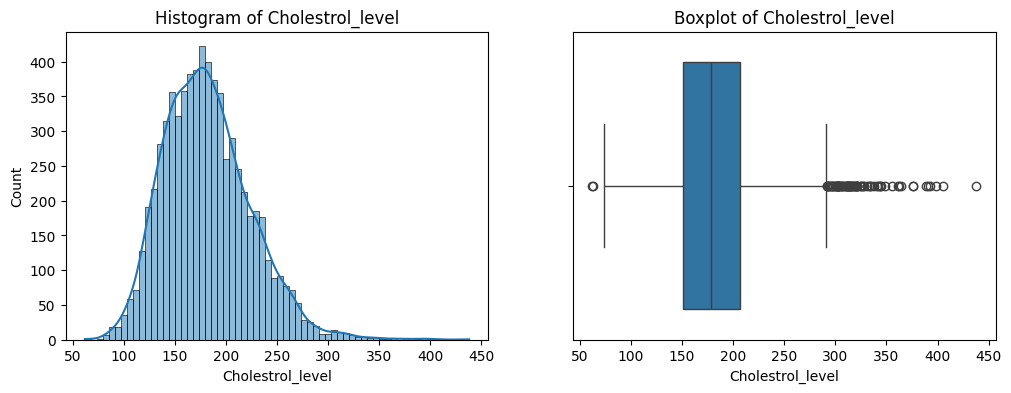

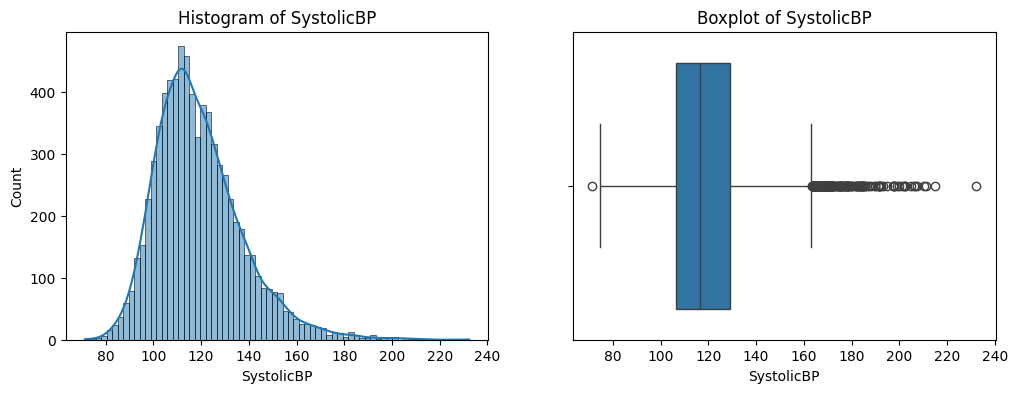

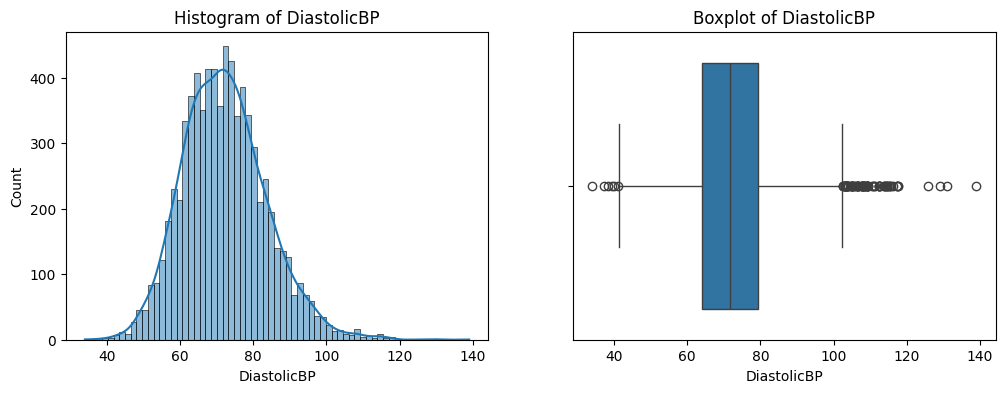

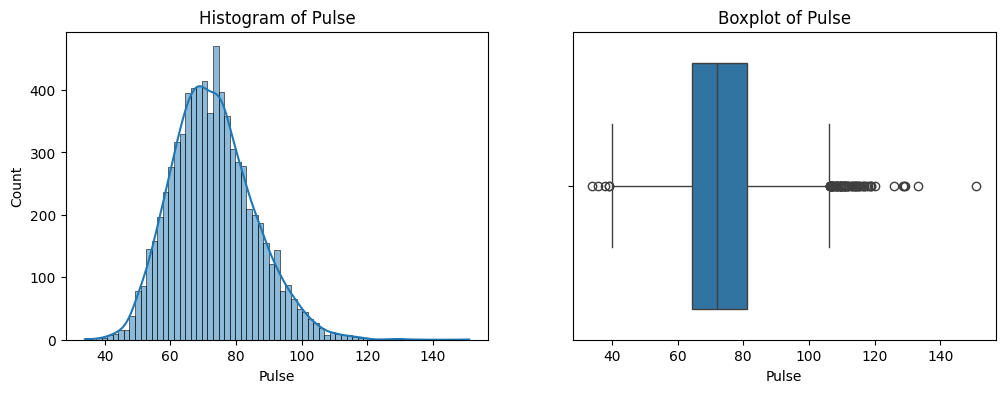

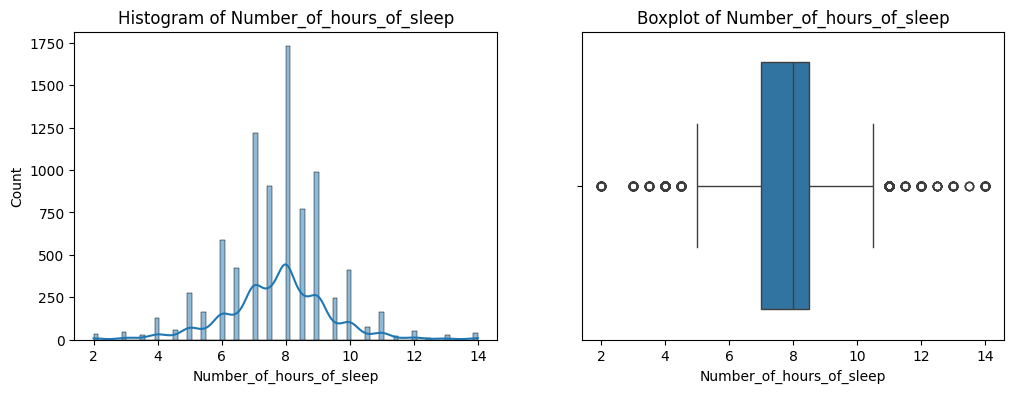

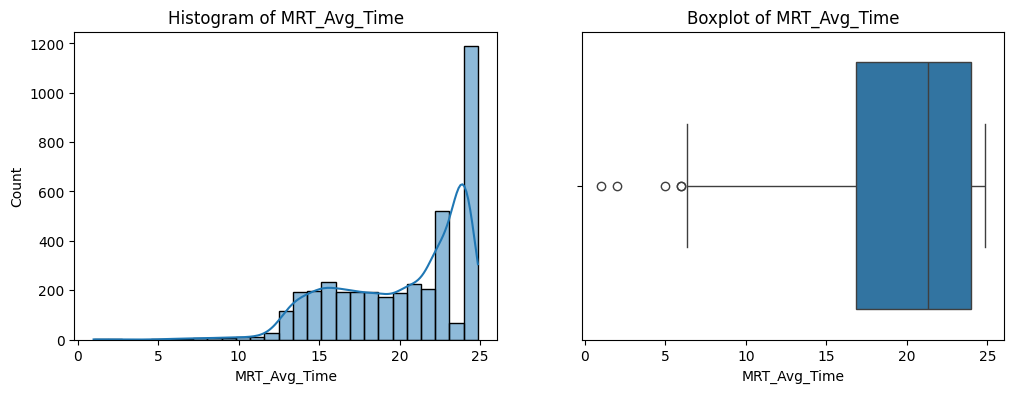

In [168]:
num_cols = ['Age','WBC','Haemoglobin','Platelete','Fasting_Glucose','HDL_mg',
            'Cholestrol_level','SystolicBP','DiastolicBP','Pulse','Number_of_hours_of_sleep','MRT_Avg_Time']

for col in num_cols:
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,2,1)
    sns.histplot(dataset[col], kde=True)
    plt.title(f'Histogram of {col}')
    
    plt.subplot(1,2,2)
    sns.boxplot(x=dataset[col])
    plt.title(f'Boxplot of {col}')
    
    plt.show()

### Handling Null Values

In [169]:
# Drop rows with >50% missing values
threshold = dataset.shape[1] * 0.5
dataset = dataset.dropna(thresh=threshold).reset_index(drop=True)
print("Shape after dropping sparse rows:", dataset.shape)


Shape after dropping sparse rows: (9253, 49)


In [170]:
# --------------------------
# 1. Age binning
# --------------------------
bins = [0, 18, 30, 45, 60, 75, 100]
labels = ['0-18','19-30','31-45','46-60','61-75','76+']
dataset['Age_Group'] = pd.cut(dataset['Age'], bins=bins, labels=labels, right=False)

In [171]:
# --------------------------
# 2. Drop high-missing columns (>50-60% missing)
# --------------------------
tricky_cols = [
    'Fasting_Glucose',
    'Advised_to_take_aspirin',
    'MRT_Avg_Time',
    'balance_combined',
    'depression_rank', 
    'Stay_in_the_shade'
]
dataset = dataset.drop(columns=tricky_cols)

In [172]:
#dummy
age0to18 = dataset[dataset['Age_Group'] =='76+']
missing_percent = age0to18.isnull().mean() * 100
print(missing_percent.sort_values(ascending=False))


Had_alcohol_in_the_past                            42.871587
Tested_for_HIV_Virus                               42.568251
HDL_mg                                             35.894843
Cholestrol_level                                   35.894843
mean_steroid_ng_dl                                 35.490394
DiastolicBP                                        33.063701
SystolicBP                                         33.063701
Pulse                                              33.063701
BODY_MEASURE_COMPOSITE                             32.254803
WBC                                                32.254803
Platelete                                          32.254803
Haemoglobin                                        32.254803
blood_macros                                       32.153691
Takes_vitamin_supplements                          30.131446
Family_poverty_level_index                         27.805865
Income_to_Poverty_Ratio                            21.941355
Number_of_hours_of_sleep

In [173]:
# --------------------------
# 3. Handle 0–18 special case
# --------------------------
age_0_18 = dataset['Age_Group'] == '0-18'

# Categorical → "N/A"
na_cols = ['Education_Level', 'Marital_Status']
dataset.loc[age_0_18, na_cols] = "N/A"

# Binary/medical → -1
binary_na_cols = [
    'Had_alcohol_in_the_past', 'Has_Disability', 'Has_Kidney_Failure', 
    'Had_Arthritis', 'Had_heart_attack', 'Had_Thyroid', 
    'Had_Liver_COndition', 'Had_Cancer',
    'Number_of_Moderate_Physical_activities_per_week',
    'Number_of_Vigorous_Physical_activities_per_week',
    'Tested_for_HIV_Virus', 'Had_high_blood_pressure'
]
dataset.loc[age_0_18, binary_na_cols] = -1

C:\Users\vickv\AppData\Local\Temp\ipykernel_28592\538981990.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'N/A' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dataset.loc[age_0_18, na_cols] = "N/A"
C:\Users\vickv\AppData\Local\Temp\ipykernel_28592\538981990.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'N/A' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dataset.loc[age_0_18, na_cols] = "N/A"


In [174]:
# --------------------------
# 4. Binary/groupwise mode (adults only)
# --------------------------
binary_cols = [
    'Had_alcohol_in_the_past', 
    'Had_high_blood_pressure', 
    'Takes_vitamin_supplements', 
    'Has_Disability', 
    'Covered_by_health_insurance', 
    'Tested_for_HIV_Virus'
]

for col in binary_cols:
    dataset.loc[~age_0_18, col] = (
        dataset.loc[~age_0_18]
        .groupby('Age_Group')[col]
        .transform(
            lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x)
        )
    )


C:\Users\vickv\AppData\Local\Temp\ipykernel_28592\2875651426.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Age_Group')[col]
C:\Users\vickv\AppData\Local\Temp\ipykernel_28592\2875651426.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Age_Group')[col]
C:\Users\vickv\AppData\Local\Temp\ipykernel_28592\2875651426.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Age_Group')[col]
C

In [175]:
# --------------------------
# 5. Numeric/groupwise median
# --------------------------
numeric_cols = [
    'WBC', 'Haemoglobin', 'Platelete', 
    'Income_to_Poverty_Ratio', 'HDL_mg', 
    'SystolicBP', 'DiastolicBP', 'Pulse', 
    'BODY_MEASURE_COMPOSITE', 'blood_macros', 'mean_steroid_ng_dl', 
    'Number_of_hours_of_sleep', 'Cholestrol_level', 
    'Number_of_Moderate_Physical_activities_per_week', 
    'Number_of_Vigorous_Physical_activities_per_week', 
    'Family_poverty_level_index'
]

for col in numeric_cols:
    dataset[col] = dataset.groupby('Age_Group')[col].transform(lambda x: x.fillna(x.median()))

C:\Users\vickv\AppData\Local\Temp\ipykernel_28592\1348531151.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataset[col] = dataset.groupby('Age_Group')[col].transform(lambda x: x.fillna(x.median()))
C:\Users\vickv\AppData\Local\Temp\ipykernel_28592\1348531151.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataset[col] = dataset.groupby('Age_Group')[col].transform(lambda x: x.fillna(x.median()))
C:\Users\vickv\AppData\Local\Temp\ipykernel_28592\1348531151.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False 

In [176]:
# --------------------------
# 6. Other categorical imputation
# --------------------------
categorical_cols = [
    'Education_Level', 'Marital_Status',
    'Has_Kidney_Failure', 'Had_Arthritis',
    'Had_heart_attack', 'Had_Thyroid',
    'Had_Liver_COndition', 'Had_Cancer','functional_difficulty_composite'
]

for col in categorical_cols:
    if col in ['Education_Level', 'Marital_Status']:
        # Adults only → mode; kids keep "N/A"
        dataset.loc[~age_0_18, col] = (
            dataset.loc[~age_0_18]
            .groupby('Age_Group')[col]
            .transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
        )
    else:
        # All age groups → mode
        dataset[col] = dataset.groupby('Age_Group')[col].transform(
            lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown')
        )



C:\Users\vickv\AppData\Local\Temp\ipykernel_28592\239483217.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('Age_Group')[col]
C:\Users\vickv\AppData\Local\Temp\ipykernel_28592\239483217.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
C:\Users\vickv\AppData\Local\Temp\ipykernel_28592\239483217.py:17: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To ret

In [177]:
# --------------------------
# 7. Country_of_Birth → Unknown
# --------------------------
dataset['Country_of_Birth'] = dataset['Country_of_Birth'].fillna('Unknown')

In [178]:
dataset['functional_difficulty_composite'].unique()

array([1., 2., 3., 9., 4., 7.])

In [179]:
# --------------------------
# 9. Final missingness check
# --------------------------
missing_pct_by_group = (
    dataset.groupby("Age_Group")
    .apply(lambda g: g.isnull().mean() * 100)
    .T
).round(1)

print("Missing % by Age Group:")
missing_pct_by_group

Missing % by Age Group:


C:\Users\vickv\AppData\Local\Temp\ipykernel_28592\1480430495.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dataset.groupby("Age_Group")
C:\Users\vickv\AppData\Local\Temp\ipykernel_28592\1480430495.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.isnull().mean() * 100)


Age_Group,0-18,19-30,31-45,46-60,61-75,76+
Had_alcohol_in_the_past,0.0,0.0,0.0,0.0,0.0,0.0
General_hearing_condition,0.0,0.0,0.0,0.0,0.0,0.0
Had_high_blood_pressure,0.0,0.0,0.0,0.0,0.0,0.0
WBC,0.0,0.0,0.0,0.0,0.0,0.0
Haemoglobin,0.0,0.0,0.0,0.0,0.0,0.0
Platelete,0.0,0.0,0.0,0.0,0.0,0.0
Gender,0.0,0.0,0.0,0.0,0.0,0.0
Age,0.0,0.0,0.0,0.0,0.0,0.0
Race_Ethnicity,0.0,0.0,0.0,0.0,0.0,0.0
Country_of_Birth,0.0,0.0,0.0,0.0,0.0,0.0


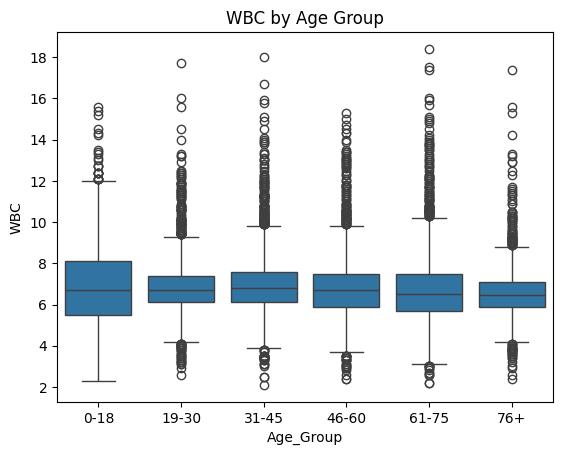

In [180]:
sns.boxplot(x='Age_Group', y='WBC', data=dataset)
plt.title('WBC by Age Group')
plt.show()


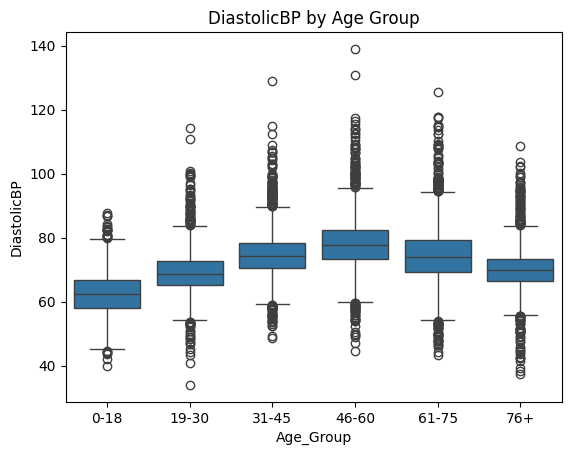

In [181]:
sns.boxplot(x='Age_Group', y='DiastolicBP', data=dataset)
plt.title('DiastolicBP by Age Group')
plt.show()


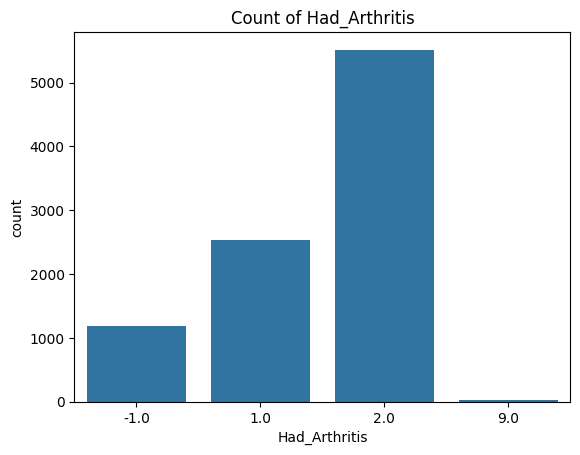

In [182]:
import seaborn as sns
sns.countplot(x='Had_Arthritis', data=dataset)
plt.title('Count of Had_Arthritis')
plt.show()


C:\Users\vickv\AppData\Local\Temp\ipykernel_28592\1396686944.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age_Group', data=df, palette="viridis", order=labels)
C:\Users\vickv\AppData\Local\Temp\ipykernel_28592\1396686944.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Has_diabetes', data=df, palette="Set1",


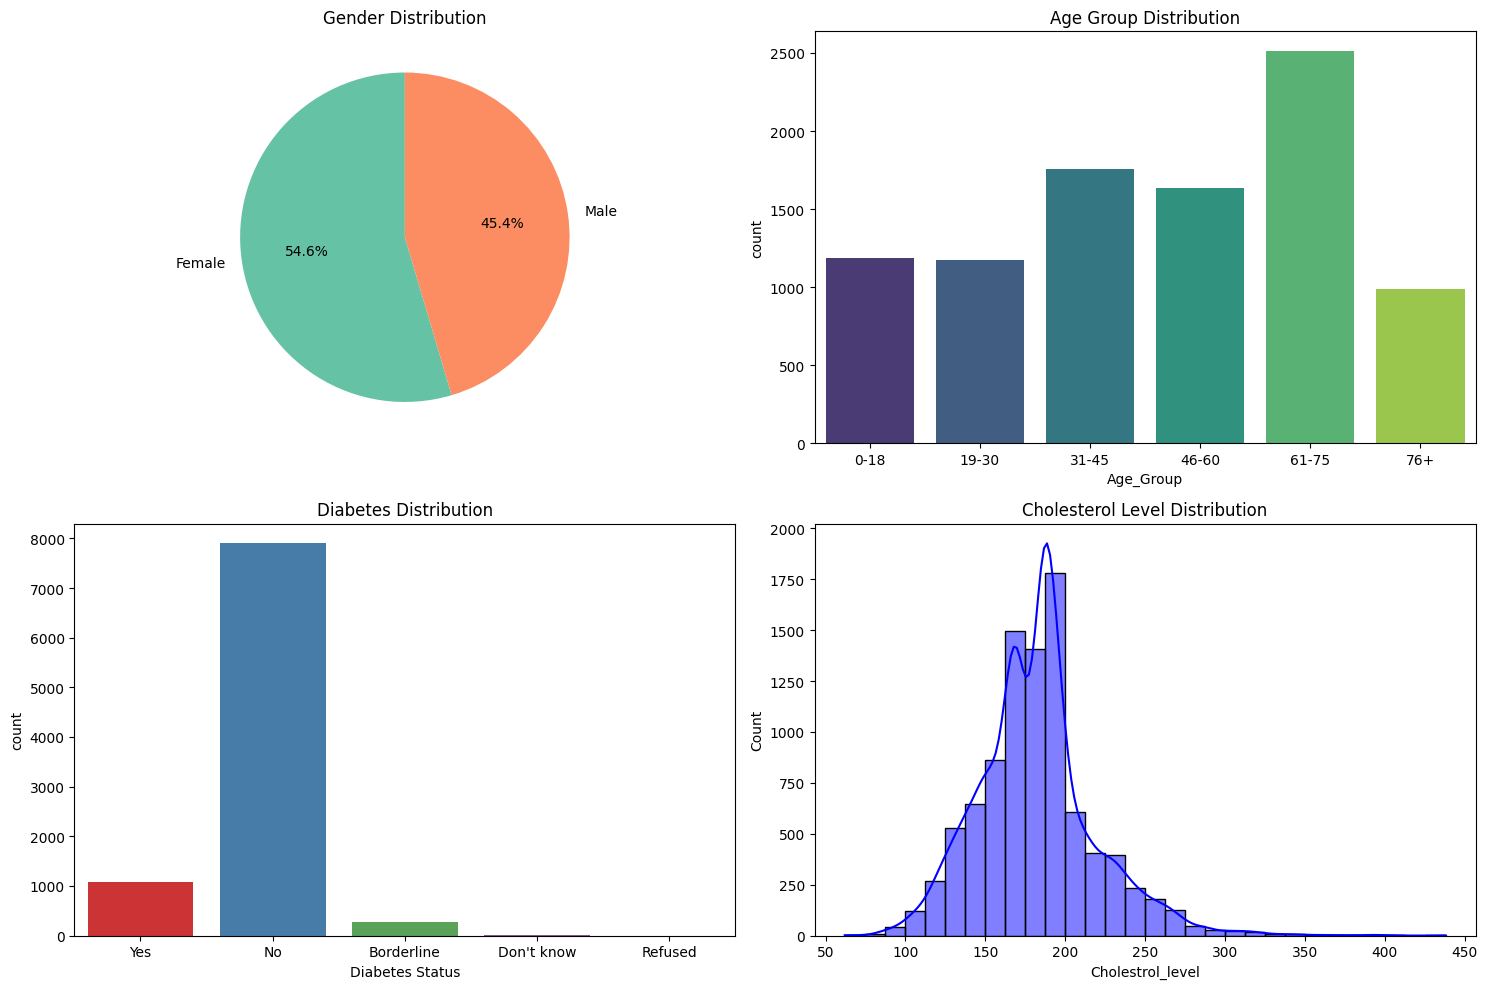

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = dataset.copy()

# Map Gender
df['Gender'] = df['Gender'].map({1: 'Male', 2: 'Female'})

# Map Diabetes
diabetes_map = {
    1: 'Yes',
    2: 'No',
    3: 'Borderline',
    7: 'Refused',
    9: "Don't know"
}
df['Has_diabetes'] = df['Has_diabetes'].map(diabetes_map)

# Create Age Groups
bins = [0, 18, 30, 45, 60, 75, 100]

plt.figure(figsize=(15,10))

# 1. Gender distribution (Pie Chart)
plt.subplot(2,2,1)
df['Gender'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    startangle=90, 
    colors=sns.color_palette("Set2")
)
plt.title("Gender Distribution")
plt.ylabel("")

# 2. Age Group Distribution (Bar Chart)
plt.subplot(2,2,2)
sns.countplot(x='Age_Group', data=df, palette="viridis", order=labels)
plt.title("Age Group Distribution")

# 3. Diabetes Distribution (Bar Chart)
plt.subplot(2,2,3)
sns.countplot(x='Has_diabetes', data=df, palette="Set1",
              order=['Yes','No','Borderline',"Don't know",'Refused'])
plt.title("Diabetes Distribution")
plt.xlabel("Diabetes Status")

# 4. Cholesterol Distribution (Histogram + KDE)
plt.subplot(2,2,4)
sns.histplot(df['Cholestrol_level'], kde=True, color="blue", bins=30)
plt.title("Cholesterol Level Distribution")

plt.tight_layout()
plt.show()


In [184]:
for col in df.columns:
    print(f"Column: {col}")
    counts = df[col].value_counts(dropna=False)
    print(counts)
    print("-"*50)


Column: Had_alcohol_in_the_past
Had_alcohol_in_the_past
 1.0    7503
-1.0    1187
 2.0     558
 9.0       5
Name: count, dtype: int64
--------------------------------------------------
Column: General_hearing_condition
General_hearing_condition
2.0     3617
1.0     3413
3.0     1276
4.0      634
5.0      279
6.0       33
99.0       1
Name: count, dtype: int64
--------------------------------------------------
Column: Had_high_blood_pressure
Had_high_blood_pressure
 2.0    5106
 1.0    2949
-1.0    1187
 9.0      10
 7.0       1
Name: count, dtype: int64
--------------------------------------------------
Column: WBC
WBC
6.70     875
6.50     687
6.80     626
6.45     319
6.60     178
        ... 
13.60      1
15.80      1
15.70      1
18.40      1
2.10       1
Name: count, Length: 144, dtype: int64
--------------------------------------------------
Column: Haemoglobin
Haemoglobin
14.0    1068
13.9     687
14.1     596
13.4     509
14.2     227
        ... 
8.0        1
9.2        1
8.5 

### Check the Data type types

In [185]:
df.shape

(9253, 44)

### Convert categorical columns to categories

In [186]:
categorical_cols = ['Had_alcohol_in_the_past', 'General_hearing_condition', 'Had_high_blood_pressure', 'Gender', 'Race_Ethnicity', 'Education_Level', 'Marital_Status', 'Has_diabetes', 
    'Takes_vitamin_supplements', 'Has_Disability', 'Has_Hepatitis', 'Covered_by_health_insurance', 'Tested_for_HIV_Virus', 'General_health_condition', 'Received_Hepatitis_A_Vaccine', 
    'Has_Kidney_Failure', 'Had_Asthma', 'Had_Arthritis', 'Had_heart_attack', 'Had_Thyroid', 'Had_Liver_COndition', 'Had_Cancer', 'Teeth_and_gum_health', 'functional_difficulty_composite',
    'Country_of_Birth','Age_Group']

# Convert to categorical
df[categorical_cols] = df[categorical_cols].astype('category')

### Convert Numerical Columns to Float

In [187]:
numerical_cols = ['WBC', 'Haemoglobin', 'Platelete', 'Age', 'Household_Size', 'Income_to_Poverty_Ratio', 'HDL_mg', 'Family_poverty_level_index', 'Number_of_Moderate_Physical_activities_per_week', 'Number_of_Vigorous_Physical_activities_per_week', 'Number_of_hours_of_sleep', 'Cholestrol_level', 'SystolicBP', 'DiastolicBP', 'Pulse', 'BODY_MEASURE_COMPOSITE', 'blood_macros', 'mean_steroid_ng_dl']

# Convert to float
df[numerical_cols] = df[numerical_cols].astype('float')

### Check dtypes again

In [188]:
df.dtypes

Had_alcohol_in_the_past                            category
General_hearing_condition                          category
Had_high_blood_pressure                            category
WBC                                                 float64
Haemoglobin                                         float64
Platelete                                           float64
Gender                                             category
Age                                                 float64
Race_Ethnicity                                     category
Country_of_Birth                                   category
Education_Level                                    category
Marital_Status                                     category
Household_Size                                      float64
Income_to_Poverty_Ratio                             float64
Has_diabetes                                       category
Takes_vitamin_supplements                          category
Has_Disability                          

### Map the values into meaning names for all the columns from the NHANES Data Dictionary

In [189]:
# Race_Ethnicity mapping
race_mapping = {
    1.0: 'Mexican American',
    2.0: 'Other Hispanic',
    3.0: 'Non-Hispanic White',
    4.0: 'Non-Hispanic Black',
    5.0: 'Other Race - Including Multi-Racial'
}

# Education_Level mapping
education_mapping = {
    1.0: 'Less than 9th grade',
    2.0: '9-11th grade (Includes 12th grade with no diploma)',
    3.0: 'High school graduate/GED or equivalent',
    4.0: 'Some college or AA degree',
    5.0: 'College graduate or above',
    7.0: 'Refused',
    9.0: 'Don\'t know',
    'N/A': 'N/A'
}

# Marital_Status mapping
marital_mapping = {
    1.0: 'Married/Living with partner',
    2.0: 'Widowed/Divorced/Separated',
    3.0: 'Never married',
    77.0: 'Refused',
    99.0: 'Don\'t know',
    'N/A': 'N/A'
}

# General_health_condition mapping
health_mapping = {
    1.0: 'Excellent',
    2.0: 'Very good',
    3.0: 'Good',
    4.0: 'Fair',
    5.0: 'Poor',
    7.0: 'Refused',
    9.0: 'Don\'t know'
}

# General_hearing_condition mapping
hearing_mapping = {
    1.0: 'Excellent',
    2.0: 'Good',
    3.0: 'A little trouble',
    4.0: 'Moderate hearing trouble',
    5.0: 'A lot of trouble',
    6.0: 'Deaf',
    77.0: 'Refused',
    99.0: 'Don\'t know'
}

# functional_difficulty_composite mapping
functional_difficulty_mapping = {
    1.0: 'No difficulty',
    2.0: 'Some difficulty',
    3.0: 'A lot of difficulty',
    4.0: 'Cannot do at all',
    7.0: 'Refused',
    9.0: 'Don\'t know'
}

# Received_Hepatitis_A_Vaccine mapping
hepatitis_vaccine_mapping = {
    1.0: 'Yes, at least 2 doses',
    2.0: 'Less than 2 doses',
    3.0: 'No doses',
    7.0: 'Refused',
    9.0: 'Don\'t know'
}

# Country_of_Birth mapping
country_of_birth_mapping = {
    1.0: 'Born in 50 US states or Washington',
    2.0: 'Others',
    77.0: 'Refused',
    99.0: 'Don\'t know',
    'Unknown': 'Unknown'
}

# Teeth_and_gum_health mapping
teeth_gum_mapping = {
    1.0: 'Excellent',
    2.0: 'Very good',
    3.0: 'Good',
    4.0: 'Fair',
    5.0: 'Poor',
    7.0: 'Refused',
    9.0: 'Don\'t know'
}

# Yes/No mapping for binary health condition columns
yes_no_mapping = {
    1.0: 'Yes',
    2.0: 'No',
    -1.0: 'Not Applicable',
    7.0: 'Refused',
    9.0: 'Don\'t know'
}

# Apply mappings for categorical columns with labels
df['Race_Ethnicity'] = df['Race_Ethnicity'].map(race_mapping)
df['Education_Level'] = df['Education_Level'].map(education_mapping)
df['Marital_Status'] = df['Marital_Status'].map(marital_mapping)
df['General_health_condition'] = df['General_health_condition'].map(health_mapping)
df['General_hearing_condition'] = df['General_hearing_condition'].map(hearing_mapping)
df['functional_difficulty_composite'] = df['functional_difficulty_composite'].map(functional_difficulty_mapping)
df['Received_Hepatitis_A_Vaccine'] = df['Received_Hepatitis_A_Vaccine'].map(hepatitis_vaccine_mapping)
df['Country_of_Birth'] = df['Country_of_Birth'].map(country_of_birth_mapping)
df['Teeth_and_gum_health'] = df['Teeth_and_gum_health'].map(teeth_gum_mapping)


In [190]:
binary_columns = [
    'Had_alcohol_in_the_past',
    'Had_high_blood_pressure',
    'Takes_vitamin_supplements',
    'Has_Disability',
    'Has_Hepatitis',
    'Covered_by_health_insurance',
    'Tested_for_HIV_Virus',
    'Has_Kidney_Failure',
    'Had_Asthma',
    'Had_Arthritis',
    'Had_heart_attack',
    'Had_Thyroid',
    'Had_Liver_COndition',
    'Had_Cancer'
]
for col in binary_columns:
    df[col] = df[col].map(yes_no_mapping)

In [191]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print("-" * 50)

Column: Had_alcohol_in_the_past
['Yes', 'No', 'Not Applicable', 'Don't know']
Categories (4, object): ['Not Applicable', 'Yes', 'No', 'Don't know']
--------------------------------------------------
Column: General_hearing_condition
['Excellent', 'Moderate hearing trouble', 'Good', 'A little trouble', 'A lot of trouble', 'Deaf', 'Don't know']
Categories (7, object): ['Excellent', 'Good', 'A little trouble', 'Moderate hearing trouble', 'A lot of trouble', 'Deaf', 'Don't know']
--------------------------------------------------
Column: Had_high_blood_pressure
['Yes', 'No', 'Not Applicable', 'Don't know', 'Refused']
Categories (5, object): ['Not Applicable', 'Yes', 'No', 'Refused', 'Don't know']
--------------------------------------------------
Column: WBC
[ 4.7   6.3   5.7   6.8   6.5   5.5   6.    8.3   5.8   9.7   9.5   5.6
  5.4   6.6  10.    6.2   4.5   8.5   6.7   5.3   6.4   9.3   4.    6.45
  8.    8.8   8.1  10.4   8.2  14.3   7.8   5.9   7.    8.7   7.7   5.
 12.1   5.2   7.1  

# Bias Detection

In [192]:
def analyze_categorical_bias(df):    
    categorical_cols = df.select_dtypes(include=['category']).columns

    bias_results = {}

    for col in categorical_cols:
        counts = df[col].value_counts(dropna=False)
        percents = df[col].value_counts(normalize=True, dropna=False) * 100
        
        print(f"\n=== {col} ===")
        print(pd.DataFrame({"Count": counts, "Percent": percents.round(2)}))
        
        # Save results if you want to analyze later
        bias_results[col] = pd.DataFrame({"Count": counts, "Percent": percents.round(2)})
    return bias_results

print(analyze_categorical_bias(df))


=== Had_alcohol_in_the_past ===
                         Count  Percent
Had_alcohol_in_the_past                
Yes                       7503    81.09
Not Applicable            1187    12.83
No                         558     6.03
Don't know                   5     0.05

=== General_hearing_condition ===
                           Count  Percent
General_hearing_condition                
Good                        3617    39.09
Excellent                   3413    36.89
A little trouble            1276    13.79
Moderate hearing trouble     634     6.85
A lot of trouble             279     3.02
Deaf                          33     0.36
Don't know                     1     0.01

=== Had_high_blood_pressure ===
                         Count  Percent
Had_high_blood_pressure                
No                        5106    55.18
Yes                       2949    31.87
Not Applicable            1187    12.83
Don't know                  10     0.11
Refused                      1     0.01



Columns to consider among categorical: Gender, race, age_group, education_level, marital_status
Apart from demographics check out for covered by health insurance(not an issue), country of birth (not an issue)

In [193]:
numerical_cols = df.select_dtypes(include=['int64','float64']).columns

# # Summary stats
# print("\n=== Descriptive Statistics ===")
# print(df[numerical_cols].describe().T)

# Skewness
print("\n=== Skewness of Numerical Columns ===")
print(df[numerical_cols].skew().sort_values(ascending=False))

# # Distribution plots
# for col in numerical_cols:
#     plt.figure(figsize=(10,4))
#     sns.histplot(df[col], kde=True, bins=30)
#     plt.title(f"Distribution of {col}")
#     plt.show()


=== Skewness of Numerical Columns ===
Number_of_Vigorous_Physical_activities_per_week    15.586175
Number_of_Moderate_Physical_activities_per_week    14.083430
mean_steroid_ng_dl                                  9.767179
blood_macros                                        6.329838
HDL_mg                                              1.358479
WBC                                                 1.219073
Platelete                                           1.087248
SystolicBP                                          1.021546
Household_Size                                      0.814041
Cholestrol_level                                    0.726698
Pulse                                               0.576454
DiastolicBP                                         0.500635
Family_poverty_level_index                          0.361019
Income_to_Poverty_Ratio                             0.067722
Number_of_hours_of_sleep                           -0.034686
BODY_MEASURE_COMPOSITE                        

Highly skewed columns - physical activity (2 columns), steroid, blood_macros
Handle outlier (remove -1 and 9999) and normalizations. 

## Categorical grouping

In [196]:
groupings = {
    "Had_alcohol_in_the_past": {
        "Not Applicable": "Unknown/NA",
        "Don't know": "Unknown/NA",
    },
    "Had_high_blood_pressure": {
        "Not Applicable": "Unknown/NA",
        "Don't know": "Unknown/NA",
        "Refused": "Unknown/NA",
    },
    "Country_of_Birth": {
        "Others": "Unknown/NA",
        "Unknown": "Unknown/NA",
    },
    "Education_Level": {
        "N/A": "Unknown/NA",
        "Don't know": "Unknown/NA",
    },
    "Marital_Status": {
        "N/A": "Unknown/NA",
        "Don't know": "Unknown/NA",
        "Refused": "Unknown/NA",
    },
    "Has_Hepatitis": {
        "Don't know": "Unknown/NA",
        "Refused": "Unknown/NA",
    },
    "Covered_by_health_insurance": {
        "Don't know": "Unknown/NA",
        "Refused": "Unknown/NA",
    },
    "Tested_for_HIV_Virus": {
        "Not Applicable": "Unknown/NA",
        "Don't know": "Unknown/NA",
        "Refused": "Unknown/NA",
    },
    "Received_Hepatitis_A_Vaccine": {
        "Don't know": "Unknown/NA",
        "Refused": "Unknown/NA",
    },
    "Has_Kidney_Failure": {
        "Not Applicable": "Unknown/NA",
        "Don't know": "Unknown/NA",
    },
    "Had_Arthritis": {
        "Not Applicable": "Unknown/NA",
        "Don't know": "Unknown/NA",
    },
    "Had_heart_attack": {
        "Not Applicable": "Unknown/NA",
        "Don't know": "Unknown/NA",
    },
    "Had_Thyroid": {
        "Not Applicable": "Unknown/NA",
        "Don't know": "Unknown/NA",
    },
    "Had_Liver_COndition": {
        "Not Applicable": "Unknown/NA",
        "Don't know": "Unknown/NA",
    },
    "Had_Cancer": {
        "Not Applicable": "Unknown/NA",
        "Don't know": "Unknown/NA",
    },
    "Teeth_and_gum_health": {
        "Don't know": "Unknown/NA",
        "Refused": "Unknown/NA",
    },
    "functional_difficulty_composite":{
        "Don't know": "Unknown/NA",
        "Refused": "Unknown/NA",
    }
}

for col, mapping in groupings.items():
    if col in df.columns:
        df[col] = df[col].replace(mapping)

print(analyze_categorical_bias(df))


=== Had_alcohol_in_the_past ===
                         Count  Percent
Had_alcohol_in_the_past                
Yes                       7503    81.09
Unknown/NA                1192    12.88
No                         558     6.03

=== General_hearing_condition ===
                           Count  Percent
General_hearing_condition                
Good                        3617    39.09
Excellent                   3413    36.89
A little trouble            1276    13.79
Moderate hearing trouble     634     6.85
A lot of trouble             279     3.02
Deaf                          33     0.36
Don't know                     1     0.01

=== Had_high_blood_pressure ===
                         Count  Percent
Had_high_blood_pressure                
No                        5106    55.18
Yes                       2949    31.87
Unknown/NA                1198    12.95

=== Gender ===
        Count  Percent
Gender                
Female   5051    54.59
Male     4202    45.41

=== Race_Eth

C:\Users\vickv\AppData\Local\Temp\ipykernel_28592\2935502979.py:77: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[col] = df[col].replace(mapping)


In [197]:
df.to_pickle('Data/df_cleaned.pkl')